In [11]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np


In [12]:
df = pd.read_csv('Tomato.csv').head(1000)

In [13]:
df = df[['Date', 'Average']]

In [14]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) #dd/mm/yy
df.set_index('Date', inplace=True)

In [15]:
# Train the SARIMA model on the dataset 3,1,3,,,1,0,2---> gave 9rmse, 3,0,2,12   4,1,4,12 gave 14 but good graph 505 for both
model = SARIMAX(df, order=(3, 1, 3), seasonal_order=(1,0,2,12)) # (p, d, q), (P, D, Q, m)
model_fit = model.fit()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.17842D+00    |proj g|=  8.18711D-02

At iterate    5    f=  3.17572D+00    |proj g|=  6.18251D-02

At iterate   10    f=  3.17375D+00    |proj g|=  7.42986D-02

At iterate   15    f=  3.16850D+00    |proj g|=  2.09198D-01

At iterate   20    f=  3.16558D+00    |proj g|=  8.60498D-02

At iterate   25    f=  3.16541D+00    |proj g|=  5.21579D-02

At iterate   30    f=  3.16529D+00    |proj g|=  3.23905D-02

At iterate   35    f=  3.16486D+00    |proj g|=  1.91733D-02

At iterate   40    f=  3.16334D+00    |proj g|=  5.26682D-02

At iterate   45    f=  3.16312D+00    |proj g|=  1.08725D-02


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.16304D+00    |proj g|=  3.70072D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     56      1     0     0   3.701D-02   3.163D+00
  F =   3.1630380590271638     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [16]:
forecast = model_fit.forecast(steps=65)

print("Forecasted Prices:")
print(forecast)

Forecasted Prices:
1000    66.599948
1001    64.570575
1002    62.365310
1003    63.782229
1004    62.066295
          ...    
1060    53.019850
1061    53.330444
1062    52.484425
1063    52.962905
1064    53.262218
Name: predicted_mean, Length: 65, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [17]:
actual = df['Average'].tail(65)

date_range = pd.date_range(start=actual.index[-1] + pd.Timedelta(days=1), periods=65, freq='D')


In [18]:
# Print the RMSE value
rmse = np.sqrt(mean_squared_error(actual, forecast))

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 10.998874471999766


In [19]:
print(df['Average'].mean())
print(actual.mean())

37.1955
55.34615384615385


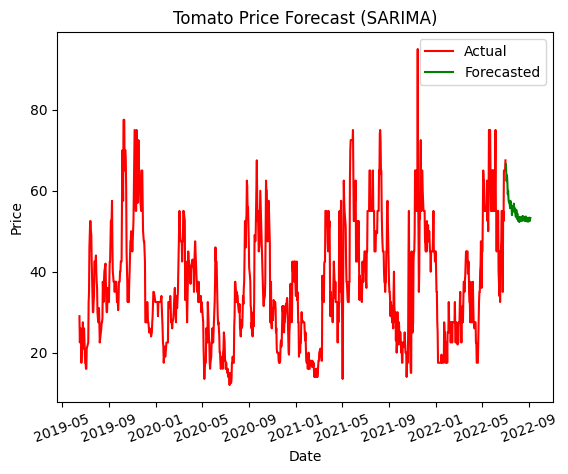

In [21]:
# Plot the actual values vs the predicted values
plt.plot(df.index, df['Average'], color='red', label='Actual')
plt.plot(date_range, forecast, color='green', label='Forecasted')
plt.title('Tomato Price Forecast (SARIMA)', color='black')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=20)
plt.show()